# CF969 - Big Data for Computational Finance
## Lab 5b: Introduction to TensorFlow

TensorFlow is a Python library developed by Google which is ideal for working with neural networks and deep learning.
It has the following especially useful features:
* Fast tensor and matrix multiplication (using GPU if present)
* Built-in automatic symbolic differentiation 
    * In particular, built-in algorithms for back-propagation 
* Lots of canned neural network structures are included:
    * Feed-forward neural networks,
    * Convolutional Networks,
    * Recurrent Neural Networks,
    * LSTMs.
    * (You might not be familiar with some of the above items in the list. We will learn about these in later lectures.)
* Lots of canned optimisation algorithms are included
    * Stochastic Gradient Descent,
    * RMSprop,
    * Adam.
    * (In the lectures we only cover Stochastic Gradient Descent. The other two I just mentioned are in some sense variations on this, and in general this holds for most optimisation algorithms used for training neural networks.)

The present Notebook for this lab is based on a corresponding notebook written by Bart de Keijzer and on a tutorial and a big set of slides created by Dr. Michael Fairbank. Some of the Python code scripts here are based on code from tensorflow.org and from https://github.com/aymericdamien/TensorFlow-Examples/, by Aymeric Damien.

When going through these notes, please experiment with the pieces of code, take your time with them, and look up the meaning of the various statements in the online TensorFlow documentation whenever you do not fully understand what is happening. 

## Basics

We start with writing a simple program in TensorFlow that outputs the string "Hello world!".

In [2]:
import tensorflow as tf
import numpy as np
hello = tf.constant("Hello World!")
print(hello)
print(hello.numpy())

tf.Tensor(b'Hello World!', shape=(), dtype=string)
b'Hello World!'


TensorFlow works with tensors as its elementary data object. A tensor is a generalisation of a matrix to higher dimensions. The number of dimensions of a tensor is called the _rank_ of the tensor. Here are some examples.
* The rank of [1 2 3 4] is 1;
* The rank of [[1 2],[3 4]] is 2 (Here I wrote down a 2 by 2 matrix on a single line);
* The rank of 2 (i.e., a scalar) is 0.

In TensorFlow the aim should be to build our code as much as possible out of tensors and matrix multiplications. This ultimately allows to "outsource" such operations to the GPU of your computer, as GPUs are generally very efficient at executing fast matrix multiplications.

(For an explanation of the meaning of the 'b' in front of the output, see: https://stackoverflow.com/questions/6269765/what-does-the-b-character-do-in-front-of-a-string-literal)

Let's go over some simple example code and analyse it.

In [3]:
a=tf.constant(2)
b=tf.constant(3)
c=tf.add(a,b)
print(c)
print(c.numpy())

tf.Tensor(5, shape=(), dtype=int32)
5


The first two lines define two tensors of rank 0, i.e., two _scalars_. The next line adds them together to form the rank 0 tensor named _c_. The final two lines print the content of c. Observe that if we care only about the numerical value of c, we must call c.numpy().

We can do the same with 2D tensors, i.e., matrices. Addition of tensors in TensorFlow is defined element-wise.

In [4]:
a=tf.constant([[1,2],[3,4]])
b=tf.constant([[5,6],[8,9]])
c=tf.add(a,b)
print(c)
print(c.numpy())

tf.Tensor(
[[ 6  8]
 [11 13]], shape=(2, 2), dtype=int32)
[[ 6  8]
 [11 13]]


Observe the above syntax for specifying a 2D tensor. You should be able to infer from this example how to define a 3D tensor.

In [5]:
# Exercise: Define two 3D tensors of the same shape and add them together.
a=tf.constant([[1,2,3],[3,4,5],[2,3,6]])
b=tf.constant([[5,6,7],[1,2,8],[8,9,10]])
c=tf.add(a,b)
print(c)
print(c.numpy())



tf.Tensor(
[[ 6  8 10]
 [ 4  6 13]
 [10 12 16]], shape=(3, 3), dtype=int32)
[[ 6  8 10]
 [ 4  6 13]
 [10 12 16]]


The function _multiply_ in tensorflow performs element-wise multiplication on tensors. This operations is also referred to as the [Hadamard product](https://en.wikipedia.org/wiki/Hadamard_product_(matrices)). Note that this is _not_ the same as matrix multiplication when performed on 2D tensors.

In [6]:
a=tf.constant([[1,2],[3,4]])
b=tf.constant([[5,6],[8,9]])
c=tf.multiply(a,b)
print(c)
print(c.numpy())

tf.Tensor(
[[ 5 12]
 [24 36]], shape=(2, 2), dtype=int32)
[[ 5 12]
 [24 36]]


The function _matmul_ performs matrix multiplication. It works whenever the number of columns of the first 2D tensor equals the number of rows of the second 2D tensor. In case we only care directly about the numerical result, we can use np.matmul instead of tf.matmul (see below).

In [9]:
a=tf.constant([[1.5,2],[3,4]], tf.float32)
b=tf.constant([[1],[2.5]], tf.float32)
c=tf.matmul(a,b)
d=np.matmul(a,b)
print(d)
print(c.numpy())

[[ 6.5]
 [13. ]]
[[ 6.5]
 [13. ]]


In [10]:
a=tf.constant([[1.5,2],[3,4]], tf.float32)
b=tf.constant([[1],[2.5]], tf.float32)
c=np.matmul(a,b)
print(c)

[[ 6.5]
 [13. ]]


## Types and Casting

When you create a tensor, it is good practice to specify its datatype, in our above code we did so in some cases (where we specified *tf.float32*), but there were also cases where we omitted this. Omitting it will make TensorFlow default to using the _int32_ (i.e., a 32 bit integer number) or _float32_ datatype, depending on whether you write a number with a decimal point included.

In [13]:
a=tf.constant(3.2, tf.float64)
b=tf.constant(3, tf.int64)
c=tf.constant([1,2,3], tf.float64)
d=tf.constant(5)
e=tf.constant(5.0)
print(a)

tf.Tensor(3.2, shape=(), dtype=float64)


In the first three lines of the code above, we specified the datatype. In the fourth line, d has type _int32_ and in the fifth line, e has type _float32_. There are other data types, such as *float64*, *int64*, and *bool*. 
Data types can be converted to each other using _cast_.

In [14]:
a=tf.constant([[1.0,2.0],[3.0,-4.0]],tf.float32)
print(tf.cast(a,tf.int32))

tf.Tensor(
[[ 1  2]
 [ 3 -4]], shape=(2, 2), dtype=int32)


Note that the output matrix is indeed an _int32_ matrix, otherwise the decimal points would be shown in the output. Casting floats to ints will result in rounding down the fractional parts of the numbers.

In [15]:
a=tf.constant([[1.7,2.3],[3.7,-4.0]],tf.float32)
print(tf.cast(a,tf.int32))

tf.Tensor(
[[ 1  2]
 [ 3 -4]], shape=(2, 2), dtype=int32)


Casting bools to ints will result in conversion of _true_ values to 1s, and _false_ values to 0s.

In [16]:
b=tf.constant([True, False, True], tf.bool)
print(tf.cast(b,tf.int32))

tf.Tensor([1 0 1], shape=(3,), dtype=int32)


If datatypes do not match, many basic operations will fail:

In [17]:
a=tf.constant(3.0, tf.float32)
b=tf.constant(3, tf.int32)
c=tf.add(a,b)

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]

In order to do the above successfully, we should use _cast_.

In [18]:
c=tf.add(a,tf.cast(b,tf.float32))
print(c)

tf.Tensor(6.0, shape=(), dtype=float32)


## Shapes, Broadcasting, and Shorthands

The shape of a tensor denotes the rank $r$ and the number of entries in each of the $r$ dimensions. For many basic operations on two tensors, the shapes must match. (But not for all, such as for _matmul_. For _matmul_ there are other constraints on the shape of the operands.)

In [21]:
a=tf.constant([1,2])
b=tf.constant([2,3,1])
f=tf.constant(tf.add(a,b))

InvalidArgumentError: {{function_node __wrapped__AddV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} Incompatible shapes: [2] vs. [3] [Op:AddV2]

In some cases, TensorFlow makes exceptions to the requirement of having matching shapes. For example, when the rank of one tensor is less than the rank of the other, TensorFlow will apply various rules to implicitly transform the smaller-rank tensor to the shape of the higher-rank tensor in such a way that the operation is performed in the most natural way possible.

In [22]:
a=tf.constant([1,2])
b=tf.constant(1)
print(tf.add(a,b))

tf.Tensor([2 3], shape=(2,), dtype=int32)


In [23]:
a=tf.constant([[1,2],[3,4]])
b=tf.constant([10,20])
print(tf.add(a,b))

tf.Tensor(
[[11 22]
 [13 24]], shape=(2, 2), dtype=int32)


In the first of these two examples, the rank 0 tensor 1 is implicitly converted to [1,1] before TensorFlow performs addition. In the second example, the rank 1 tensor [10,20] is implicitly converted to [[10,20],[10,20]]. 

This behaviour is called _broadcasting_. This can be convenient but also very confusing. A precise description of broadcasting rules can be found at https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html .

We have seen up to now various operations on tensors that take two operands. There are also operations that take a single operand. In the below examples we see how to compute respectively the element-wise square, absolute value, and hyperbolic tangent of a tensor.

In [24]:
a=tf.constant([[1,2],[3,-4]],tf.float32)
print(tf.square(a))

tf.Tensor(
[[ 1.  4.]
 [ 9. 16.]], shape=(2, 2), dtype=float32)


In [25]:
print(tf.abs(a))

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)


In [26]:
print(tf.tanh(a))

tf.Tensor(
[[ 0.7615942  0.9640276]
 [ 0.9950548 -0.9993293]], shape=(2, 2), dtype=float32)


We can also perform element-wise comparison. See for example https://www.tensorflow.org/api_docs/python/tf/math/greater. These operations result in tensors of *bools*: one for each element, indicating if the respective comparison is true for each of the elements.

In [27]:
a=tf.constant([1,2,3])
b=tf.constant([5,1,7])
print(tf.greater(a,b))

tf.Tensor([False  True False], shape=(3,), dtype=bool)


Note that broadcasting will also work in those cases:

In [28]:
print(tf.greater(a,1))

tf.Tensor([False  True  True], shape=(3,), dtype=bool)


Some of TensorFlow's functions have shorthand notation: One can write * for *multiply*, + for *add*, - for *subtract*, and > for *greater*.

In [29]:
a=tf.constant([[1,2],[3,4]])
b=tf.constant([[5,6],[8,9]])
print(a+b)

tf.Tensor(
[[ 6  8]
 [11 13]], shape=(2, 2), dtype=int32)


## Variables

TensorFlow _variables_ are tensors and are the recommended way to represent shared, persistent state your program manipulates. 

In [30]:
a=tf.constant([[5,2],[1,2]])
var_a = tf.Variable(a)
b=tf.add(var_a,var_a)
print(b)

tf.Tensor(
[[10  4]
 [ 2  4]], shape=(2, 2), dtype=int32)


In [31]:
print(var_a)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[5, 2],
       [1, 2]], dtype=int32)>


A variable looks and acts like a tensor, and, in fact, is a data structure backed by a tf.Tensor. Like tensors, they have a dtype and a shape, and can be exported to NumPy.

In [32]:
print("Shape: ", var_a.shape)
print("DType: ", var_a.dtype)
print("As NumPy: ", var_a.numpy())

Shape:  (2, 2)
DType:  <dtype: 'int32'>
As NumPy:  [[5 2]
 [1 2]]


In [35]:
var_a.name 

'Variable:0'

Variables can be updated by using the _assign_ function:

In [37]:
W = tf.Variable([0.3], tf.float32)
W.assign([-1.0])
print(W.numpy())
W.name

[-1.]


'Variable:0'

Note however that it is not allowed to resize the variable

In [38]:
try:
  W.assign([1.0, 2.0, 3.0])
except Exception as e:
  print(f"{type(e).__name__}: {e}")

ValueError: Cannot assign value to variable ' Variable:0': Shape mismatch.The variable shape (1,), and the assigned value shape (3,) are incompatible.


If you use a variable like a tensor in operations, you will usually operate on the backing tensor. Creating new variables from existing variables duplicates the backing tensors. Two variables will not share the same memory.

In [39]:
a = tf.Variable([2.0, 3.0])
# Create b based on the value of a
b = tf.Variable(a)
a.assign([5, 6])

# a and b are different
print('a= ',a.numpy())
print('b= ',b.numpy())

# There are other versions of assign
print(a.assign_add([2,3]).numpy())  # [7. 9.]
print(a.assign_sub([7,9]).numpy())  # [0. 0.]

a=  [5. 6.]
b=  [2. 3.]
[7. 9.]
[0. 0.]


## Aggregation Functions

TensorFlow has various aggregation functions, most of them starting with the word _reduce_. The following examples compute respectively the sum, mean, and maximum of the elements of a tensor.

In [ ]:
a=tf.constant([[1,2],[3,4]],tf.float32)
print(tf.reduce_sum(a))

In [ ]:
print(tf.reduce_mean(a))

In [ ]:
print(tf.reduce_max(a))

In [ ]:
# Exercise: Try to predict what will be the result of the following code. Run the code to verify your answer.

a=tf.constant([[1,2],[3,4]],tf.float32)
print(tf.reduce_sum(tf.cast(a>1,tf.float32)))

The function _argmax_ takes a tensor and returns the index where the maximum value among the entries in the tensor occurs. Note here that indexing starts at 0. Observe the difference between _reduce&#95;max_ and *argmax*:

In [ ]:
a=tf.constant([4,0,5,-4],tf.float32)
print(tf.reduce_max(a))

In [ ]:
print(tf.argmax(a))

In [ ]:
a=tf.constant([4,0,5,-4],tf.float32)
print([tf.reduce_min(a),tf.reduce_max(a)])

Aggregation functions can be restricted to be evaluated over a single axis of a tensor.

In [ ]:
a=tf.constant([[1,2],[3,4]])
print(tf.reduce_sum(a, axis=0))

In [ ]:
print(tf.reduce_sum(a, axis=1))

In [ ]:
# Exercise: Based on the previous examples, you can predict how axis numbering works on tensors of rank higher than 2. 
# What would be the result of the following code? Run the code to verify your answer.

a=tf.constant([[[5,6],[7,8]],[[1,2],[3,4]]])
print(tf.reduce_sum(a, axis=2))
print(tf.reduce_sum(a, axis=1))
print(tf.reduce_sum(a, axis=0))

The same can be done with other aggregation functions, such as _reduce&#95;max_ and *argmax*:

In [ ]:
a=tf.constant([[5,10,0],[3,4,12]])
print(tf.reduce_max(a, axis=0))

In [ ]:
print(tf.argmax(a, axis=1))

## Automatic Differentiation

TensorFlow is capable of symbolically differentiating mathematical formulas (expressed in TensorFlow's syntax). Consider the following example. Recall that ** is the operator corresponding to exponentiation.

In [ ]:
x=tf.Variable(5.0,tf.float32)
with tf.GradientTape() as tape:
  y = x**2

# dy = 2x * dx
dy_dx = tape.gradient(y, x)
dy_dx.numpy()

TensorFlow provides the tf.GradientTape API for automatic differentiation; that is, computing the gradient of a computation with respect to some inputs, that are usually tf.Variables. TensorFlow "records" relevant operations executed inside the context of a tf.GradientTape onto a "tape" and uses that tape to compute the gradients.

The above piece of code first defines a variable x and sets its value to $5$, then defines $y$ to stand for the multiplication of $x$ with itself, i.e., $y = x^2$. It defines dy_dx to be the derivative of y with respect to x. This is done by calling the function _gradient_ and specifying as its first argument the mathematical function to differentiate, and as its second argument a list of variables with respect to which the function is differentiated. In this case, we differentiate with respect to only the variable x. If more variables are specified, dydx will be a (Python) list containing the respective derivatives as its element. 

The following is an example of a two-variable function, of which we can compute both its derivatives. Observe the two different ways of doing that.

In [ ]:
x=tf.Variable(4.0,tf.float32)
y=tf.Variable(2.0,tf.float32)

# First way
with tf.GradientTape() as tape:
    f=tf.pow(x,2.0)*3.0+y
z = tape.gradient(f,{'x': x,'y': y})
print('dz/dx:', z['x'])
print('dz/dy:', z['y'])

# Second way: we get the gradients as a list
with tf.GradientTape() as tape2:
    ff=tf.pow(x,2.0)*3.0+y
[dfdx, dfdy] = tape2.gradient(ff,[x,y])
print(dfdx)
print(dfdy)

In [ ]:
#Combining both ways using two tapes
x=tf.Variable(4.0,tf.float32)
y=tf.Variable(2.0,tf.float32)

with tf.GradientTape() as tape0, tf.GradientTape() as tape1:
    f=tf.pow(x,2.0)*3.0+y
z = tape0.gradient(f,{'x': x,'y': y})
[dfdx,dfdy] = tape1.gradient(f,[x,y])
print('dz/dx:', z['x'])
print('dz/dy:', z['y'])
print(dfdx)
print(dfdy)

Automatic differentiation can also handle variables that are tensors of higher rank than 0. This feature is very useful to neural network programming, and makes it very easy to implement backpropagation algorithms, which are fundamental to training neural networks (we will discuss backpropagation at some point in the lectures).

## Gradient Descent

_Gradient descent_ stands for a family of algorithms to find minima (or maxima) of functions. Suppose that we want to find the minimum of some function f(x). A basic backpropagation algorithm then works as follows. Fix a parameter _eta_ to any positive small value. Start with any initial input x_0 to the function. Compute the derivative _dfdx_ of f at x_0 and set x_1 to the value x_0 - _eta_ \* _dfdx_. If f(x_1) < f(x_0), then we repeat this step on x_1, resulting in a sequence of points x_0, x_1, x_2, ..., x_k, where for x_k it holds that an additional iteration performed on x_k would not yield a decrease in the value of f.

![title](images/gradientdescent.png)

For this algorithm, it is clearly important to not make $\eta$ (*eta*) (which is often referred to as the *step size* or *learning rate*) too large, as this might result in the function not having decreased at the next iteration while a decrease could have been possible if $\eta$ were smaller. It is also important to not make $\eta$ too small, as this might result in very tiny progress each step. Please study the following code and complete the three lines containing "TODO" comments. It should  use gradient descent to minimise the function $f(x) = x^2 - 4x + 4$. 

![title](images/function.png)

In [ ]:
x = tf.Variable(10.0, tf.float32) # arbitrary initial value
eta = 0.1 # learning rate

for i in range(50):
    with tf.GradientTape() as tape:
        y =                    #TODO put in formula for y = x^2 - 4x + 4

    dydx=tape.gradient(        # TODO finish this line
    x.assign(                  # TODO finish x_(t+1)=x_t-eta*dydx.
    print("iteration:",i,"x:", x.numpy()," y:",y.numpy())


A nice feature of TensorFlow is that it has many optimisers built in, and one of these optimisers is the basic gradient descent optimiser. It can be accessed under _optimizers.SGD_ and takes the learning rate $\eta$ as a parameter. Therefore, the following code does the same as your solution above.

In [ ]:
x = tf.Variable(10.0, dtype=tf.float32) # arbitrary initial value
eta = 0.1 # learning rate

optimizer = tf.optimizers.SGD(learning_rate=eta)    
loss = lambda:x**2-4.0*x+4.0

for i in range(50):
    optimizer.minimize(loss,[x])
    print("iteration:",i, "x:", x.numpy())

Note that we have specified through _optimizer.minimize()_ which function the built-in Stochastic Gradient Descent Optimizer should minimize. TensorFlow then automatically infers on which variables y depends.

There are various other canned optimisers in TensorFlow, such as the _Adam_ and _RMSprop_. As an exercise, please modify the above code and run it with those two optimisers instead of the _SGD_ optimizer.

Gradient descent, and various derived optimisation methods are used heavily in neural networks and algorithms for deep learning, to train deep neural networks. You probably understand from the above explanation and code that neural networks makes "local" improvements, and can end up in a local minimum of a function. This is why gradient descent is often applied multiple times on a given function, at multiple starting positions, in the hope to find the global minimum among the set of local minima that a function may have.

What we have seen here is gradient descent applied on a function of a single variable. Gradient descent can also be applied on functions of many variables, which is how it is applied when one has to train neural networks.

## Example: Linear Regression
We now see an example of linear regression. Linear regression is perhaps the simplest example of a Machine Learning algorithm. In fact, many would argue that linear regression is a fundamental notion, well-known for example in Statistics, and that renaming it as a Machine Learning algorithm is more of a *marketing* thing.

We are given in input a set of pairs of the form $(x,y)$. Our goal is to find a lienar function $f()$ that fits the pairs $(x,y)$ in the best possible way. We will talk more about it in the next lectures.

We assume, therefore, that there exist parameters $W$ and $b$ such that $f(x) = W\cdot x+b$. $W$ is also known as the slope, while $b$ is known as the intercept. 

We view each pair $(x,y)$ as an observation that originates from this function. Inevitably, our function $f()$ will not fit all pairs, i.e., there will be errors since we restrict to be linear. Our goal is to minimize this error.

Observe that below we follow a modular approach. That is, we define appropriate functions and use them where appopriate.


In [15]:
import matplotlib.pyplot as plt
rng = np.random 

In [16]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

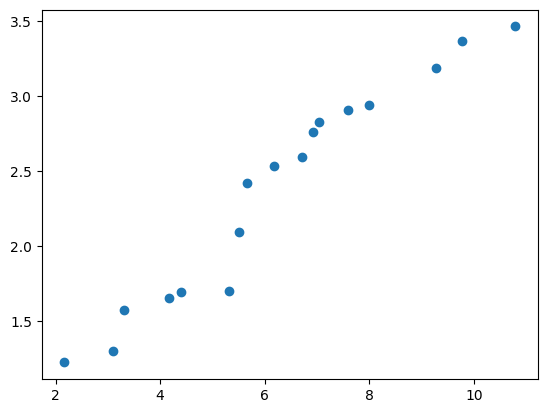

In [17]:
# Training Data.
X = np.array([2.167, 3.1, 3.3, 4.168, 4.4, 5.313, 5.5, 5.654, 6.182, 6.71, 6.93, 7.042, 7.59, 7.997, 9.27, 9.779, 10.791])
Y = np.array([1.221,  1.3, 1.573, 1.65, 1.694, 1.7,2.09, 2.42, 2.53, 2.596, 2.76, 2.827, 2.904, 2.94, 3.19, 3.366, 3.465])

# Let's plot the data. We will plot them again later.
plt.scatter(X,Y)

In [18]:
# Weight and Bias, initialized randomly.
slope = tf.Variable(rng.randn(), name="slope")
intercept = tf.Variable(rng.randn(), name="intercept")

In [19]:
# Linear regression (Wx + b). This is where the define the corresponding function.
def linear_regression(x):
    return slope* x + intercept

In [20]:
# Mean square error. This is where we define the error function.
# For each data point, we compute (predicted_value - true_value)^2 and sum over all data points
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [21]:
# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [22]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients. Since we have two variables, we get two gradients.
    gradients = g.gradient(loss, [slope, intercept])
    
    # Update W and b following gradients. What does zip do? Can you figure it out?
    optimizer.apply_gradients(zip(gradients, [slope, intercept]))

In [23]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, slope.numpy(), intercept.numpy()))

step: 50, loss: 0.101409, W: 0.185241, b: 1.305653
step: 100, loss: 0.085632, W: 0.197646, b: 1.217706
step: 150, loss: 0.073259, W: 0.208632, b: 1.139824
step: 200, loss: 0.063556, W: 0.218360, b: 1.070854
step: 250, loss: 0.055947, W: 0.226975, b: 1.009777
step: 300, loss: 0.049979, W: 0.234605, b: 0.955689
step: 350, loss: 0.045299, W: 0.241361, b: 0.907791
step: 400, loss: 0.041629, W: 0.247344, b: 0.865374
step: 450, loss: 0.038751, W: 0.252642, b: 0.827811
step: 500, loss: 0.036494, W: 0.257334, b: 0.794547
step: 550, loss: 0.034724, W: 0.261489, b: 0.765089
step: 600, loss: 0.033336, W: 0.265169, b: 0.739002
step: 650, loss: 0.032247, W: 0.268427, b: 0.715901
step: 700, loss: 0.031394, W: 0.271313, b: 0.695443
step: 750, loss: 0.030724, W: 0.273868, b: 0.677326
step: 800, loss: 0.030199, W: 0.276131, b: 0.661283
step: 850, loss: 0.029787, W: 0.278135, b: 0.647075
step: 900, loss: 0.029464, W: 0.279910, b: 0.634493
step: 950, loss: 0.029211, W: 0.281482, b: 0.623351
step: 1000, l

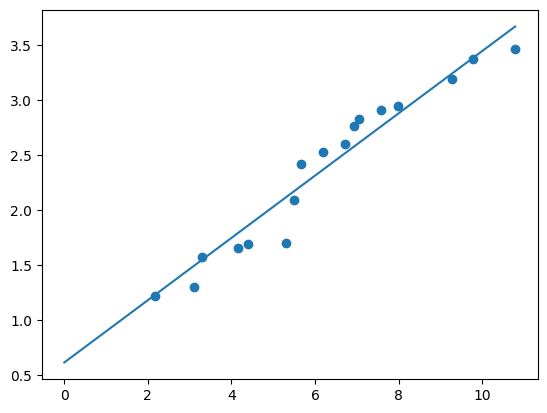

In [24]:
# Let's visualize the solution

xfit = np.linspace(0, max(X))
yfit = slope*xfit+intercept
plt.scatter(X,Y)
plt.plot(xfit,yfit)


Feel free the play with the data points and see how this changes the output. You can also play with the learning rate and the number of steps.